<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/microsoft/Florence_Large_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microsoft Florence (Multi Task Vision Model)

Florence-2 is an advanced vision foundation model that uses a prompt-based approach to handle a wide range of vision and vision-language tasks. Florence-2 can interpret simple text prompts to perform tasks like captioning, object detection, and segmentation. It leverages our FLD-5B dataset, containing 5.4 billion annotations across 126 million images, to master multi-task learning. The model's sequence-to-sequence architecture enables it to excel in both zero-shot and fine-tuned settings, proving to be a competitive vision foundation model.

***Florence-2-B model with 232 million parameters and Florence-2-L model with 771 million parameters.***

https://huggingface.co/collections/microsoft/florence-6669f44df0d87d9c3bfb76de

https://arxiv.org/pdf/2311.06242


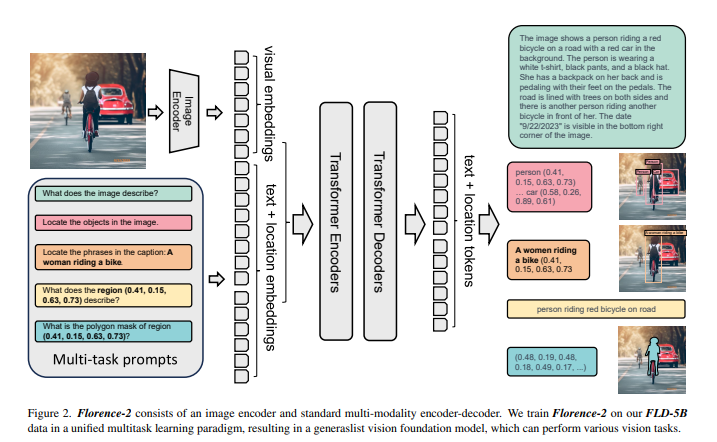

In [1]:
%pip install flash_attn einops timm mlflow pyngrok accelerate --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 13.

In [2]:
# from google.colab import userdata
# NGROK  = userdata.get('NGROK')

In [3]:
# from pyngrok import ngrok

# get_ipython().system_raw("mlflow ui --port 5000 &")


# # Terminate open tunnels if exist
# ngrok.kill()

In [4]:
# ngrok.set_auth_token(NGROK)

# # Open an HTTPs tunnel on port 5000 for http://localhost:5000
# ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
# print("MLflow Tracking UI:", ngrok_tunnel.public_url)

In [5]:
import warnings

# Disable a few less-than-useful UserWarnings from setuptools and pydantic
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)

import matplotlib.pyplot as plt
import argparse
import imutils
import cv2


In [6]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM
import mlflow
import accelerate
import torch
import transformers

model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it\n
  try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  except:
    image = image.convert('RGB')
  # show the image
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [8]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      early_stopping=False,
      max_new_tokens=1024,
      do_sample=False,
      num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))

    return parsed_answer

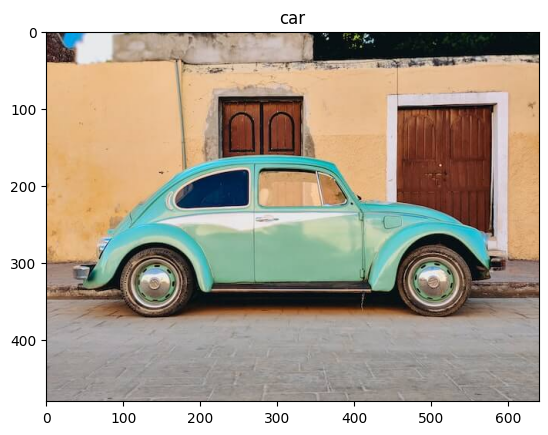

In [9]:
plt_imshow("car", image)

In [10]:
prompt = "<CAPTION>"
run_example(prompt)


{'<CAPTION>': '\nA green car parked in front of a yellow building.\n'}

In [11]:
prompt = "<DETAILED_CAPTION>"
run_example(prompt)


{'<DETAILED_CAPTION>': '\nThe image shows a green Volkswagen Beetle parked in front of a yellow building with two brown doors. The sky is a mix of blue and white, and there are a few green trees in the background.\n'}

In [12]:
prompt = "<MORE_DETAILED_CAPTION>"
run_example(prompt)


{'<MORE_DETAILED_CAPTION>': '\nThe image shows a vintage Volkswagen Beetle car parked on a cobblestone street in front of a yellow building with two wooden doors. The car is painted in a bright turquoise color and has a white stripe running along the side. It has two doors on either side of the car, one on top of the other, and a small window on the front. The building appears to be old and dilapidated, with peeling paint and crumbling walls. The sky is blue and there are trees in the background.\n'}


## Object detection
OD results format: {'<OD>': { 'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...] } }


In [13]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[34.23999786376953, 160.0800018310547, 597.4400024414062, 371.7599792480469], [456.0, 97.68000030517578, 580.1599731445312, 261.8399963378906], [450.8800048828125, 276.7200012207031, 554.5599975585938, 370.79998779296875], [95.68000030517578, 280.55999755859375, 198.72000122070312, 371.2799987792969]], 'labels': ['car', 'door', 'wheel', 'wheel']}}


In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

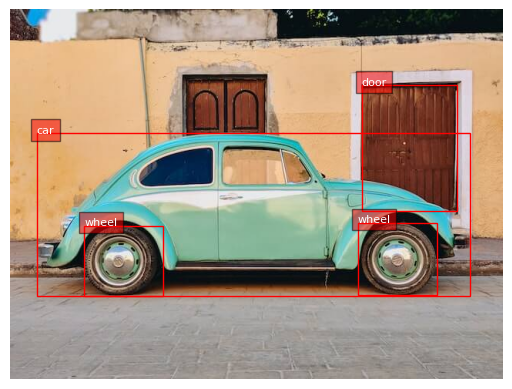

In [15]:
plot_bbox(image, results['<OD>'])


## Dense region caption
Dense region caption results format: {'<DENSE_REGION_CAPTION>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...]}}

In [16]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

{'<DENSE_REGION_CAPTION>': {'bboxes': [[33.599998474121094, 160.0800018310547, 596.7999877929688, 371.7599792480469], [450.8800048828125, 276.7200012207031, 553.2799682617188, 370.79998779296875], [95.04000091552734, 280.55999755859375, 197.44000244140625, 371.2799987792969]], 'labels': ['turquoise Volkswagen Beetle', 'wheel', 'wheel']}}


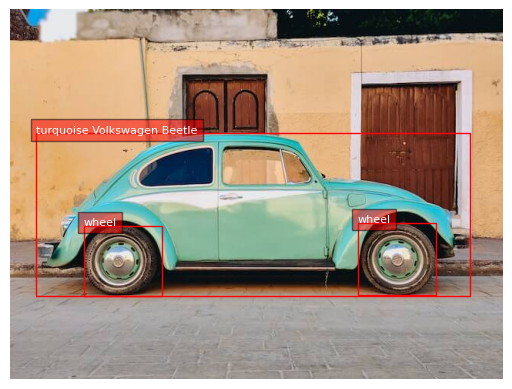

In [17]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

##Region proposal
Region proposal results format: {'<REGION_PROPOSAL>' : {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [18]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

{'<REGION_PROPOSAL>': {'bboxes': [[33.599998474121094, 160.0800018310547, 596.7999877929688, 371.7599792480469], [455.3599853515625, 97.68000030517578, 579.5199584960938, 261.8399963378906], [450.8800048828125, 276.7200012207031, 553.2799682617188, 370.79998779296875], [95.04000091552734, 280.55999755859375, 198.0800018310547, 371.2799987792969], [226.87998962402344, 88.55999755859375, 332.47998046875, 164.39999389648438], [65.5999984741211, 266.6399841308594, 86.72000122070312, 295.91998291015625], [271.67999267578125, 241.67999267578125, 302.3999938964844, 246.95999145507812], [408.0, 308.3999938964844, 413.7599792480469, 320.8800048828125]], 'labels': ['', '', '', '', '', '', '', '']}}


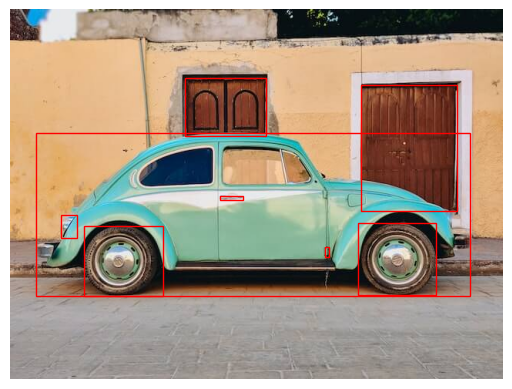

In [19]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

#Run pre-defined tasks that requires additional inputs
##Phrase Grounding
Phrase grounding results format: {'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [20]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")
print(results)

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.880001068115234, 158.63999938964844, 583.3599853515625, 374.6399841308594], [0.3199999928474426, 4.079999923706055, 639.0399780273438, 305.03997802734375]], 'labels': ['A green car', 'a yellow building']}}


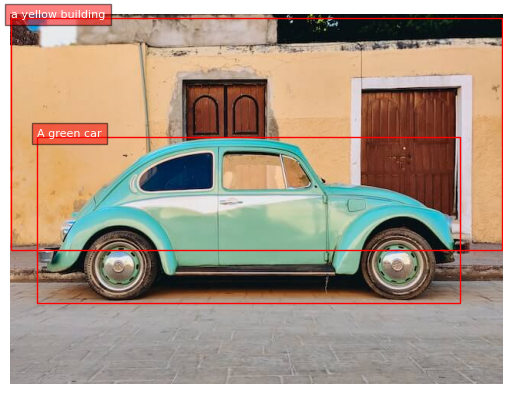

In [21]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

## Referring expression segmentation
Referring expression segmentation results format: {'<REFERRING_EXPRESSION_SEGMENTATION>': {'Polygons': [[[polygon]], ...], 'labels': ['', '', ...]}}, one object is represented by a list of polygons. each polygon is [x1, y1, x2, y2, ..., xn, yn]

In [22]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

{'<REFERRING_EXPRESSION_SEGMENTATION>': {'polygons': [[[178.87998962402344, 181.67999267578125, 180.8000030517578, 180.72000122070312, 182.72000122070312, 180.72000122070312, 187.83999633789062, 177.83999633789062, 189.75999450683594, 177.83999633789062, 192.95999145507812, 175.9199981689453, 194.87998962402344, 175.9199981689453, 198.0800018310547, 174.0, 200.63999938964844, 173.0399932861328, 203.83999633789062, 172.0800018310547, 207.0399932861328, 170.63999938964844, 209.59999084472656, 169.67999267578125, 214.0800018310547, 168.72000122070312, 217.9199981689453, 167.75999450683594, 221.75999450683594, 166.8000030517578, 226.239990234375, 165.83999633789062, 230.72000122070312, 164.87998962402344, 237.1199951171875, 163.9199981689453, 244.1599884033203, 162.95999145507812, 253.1199951171875, 162.0, 265.2799987792969, 161.0399932861328, 311.3599853515625, 161.0399932861328, 329.2799987792969, 162.0, 338.239990234375, 162.95999145507812, 345.2799987792969, 163.9199981689453, 350.3999

In [23]:
len(results['<REFERRING_EXPRESSION_SEGMENTATION>']['polygons'][0][0])

514

In [24]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
import copy
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    # Save or display the image
    #image.show()  # Display the image
    display(image)

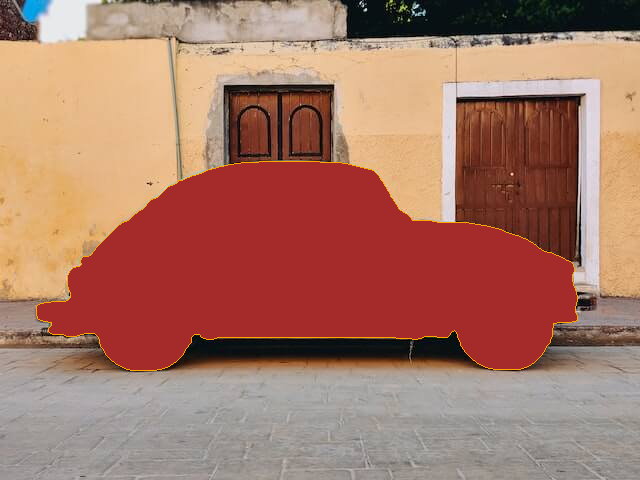

In [25]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

## region to segmentation
with additional region as inputs, format is '<loc_x1><loc_y1><loc_x2><loc_y2>', [x1, y1, x2, y2] is the quantized coordinates in [0, 999].

In [26]:
task_prompt = '<REGION_TO_SEGMENTATION>'
results = run_example(task_prompt, text_input="<loc_702><loc_575><loc_866><loc_772>")
print(results)

{'<REGION_TO_SEGMENTATION>': {'polygons': [[[470.0799865722656, 288.239990234375, 473.91998291015625, 285.3599853515625, 477.1199951171875, 283.44000244140625, 479.03997802734375, 282.47998046875, 480.9599914550781, 282.47998046875, 484.1600036621094, 280.55999755859375, 486.7200012207031, 279.6000061035156, 489.91998291015625, 278.6399841308594, 495.03997802734375, 277.67999267578125, 512.3200073242188, 277.67999267578125, 514.8800048828125, 278.6399841308594, 518.0800170898438, 279.6000061035156, 521.2799682617188, 281.5199890136719, 523.2000122070312, 281.5199890136719, 525.1199951171875, 283.44000244140625, 528.3200073242188, 284.3999938964844, 530.8800048828125, 286.32000732421875, 534.0800170898438, 288.239990234375, 543.0399780273438, 297.3599853515625, 544.9599609375, 300.239990234375, 546.8800048828125, 303.1199951171875, 550.0800170898438, 309.3599853515625, 551.3599853515625, 312.239990234375, 552.0, 315.1199951171875, 553.2799682617188, 319.44000244140625, 553.2799682617188

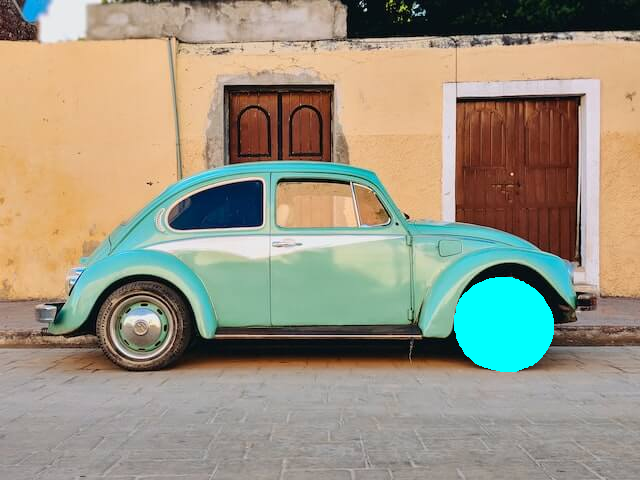

In [27]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REGION_TO_SEGMENTATION>'], fill_mask=True)

## Open vocabulary detection
open vocabulary detection can detect both objects and ocr texts.

results format:

{ '<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[x1, y1, x2, y2], [x1, y1, x2, y2], ...]], 'bboxes_labels': ['label_1', 'label_2', ..], 'polygons': [[[x1, y1, x2, y2, ..., xn, yn], [x1, y1, ..., xn, yn]], ...], 'polygons_labels': ['label_1', 'label_2', ...] }}

In [28]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

{'<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[34.23999786376953, 158.63999938964844, 582.719970703125, 374.1600036621094]], 'bboxes_labels': ['a green car'], 'polygons': [], 'polygons_labels': []}}


In [29]:
def convert_to_od_format(data):
    """
    Converts a dictionary with 'bboxes' and 'bboxes_labels' into a dictionary with separate 'bboxes' and 'labels' keys.

    Parameters:
    - data: The input dictionary with 'bboxes', 'bboxes_labels', 'polygons', and 'polygons_labels' keys.

    Returns:
    - A dictionary with 'bboxes' and 'labels' keys formatted for object detection results.
    """
    # Extract bounding boxes and labels
    bboxes = data.get('bboxes', [])
    labels = data.get('bboxes_labels', [])

    # Construct the output format
    od_results = {
        'bboxes': bboxes,
        'labels': labels
    }

    return od_results

In [30]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

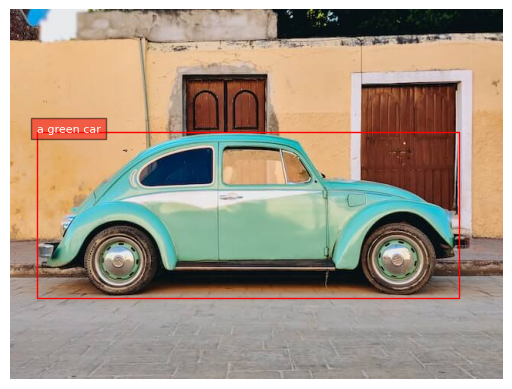

In [31]:
plot_bbox(image, bbox_results)

In [32]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a door")
print(results)

{'<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[454.0799865722656, 94.31999969482422, 582.719970703125, 265.1999816894531]], 'bboxes_labels': ['a door'], 'polygons': [], 'polygons_labels': []}}


In [33]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

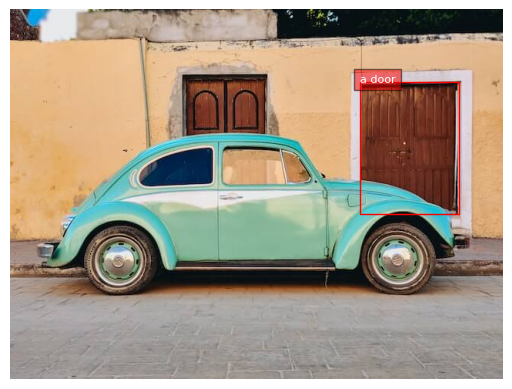

In [34]:
plot_bbox(image, bbox_results)

In [35]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a window")
print(results)

{'<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[223.0399932861328, 83.75999450683594, 336.32000732421875, 166.8000030517578], [273.6000061035156, 177.36000061035156, 393.2799987792969, 232.55999755859375], [164.16000366210938, 177.36000061035156, 267.1999816894531, 234.47999572753906]], 'bboxes_labels': ['a window', 'a window', 'a window'], 'polygons': [], 'polygons_labels': []}}


In [36]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

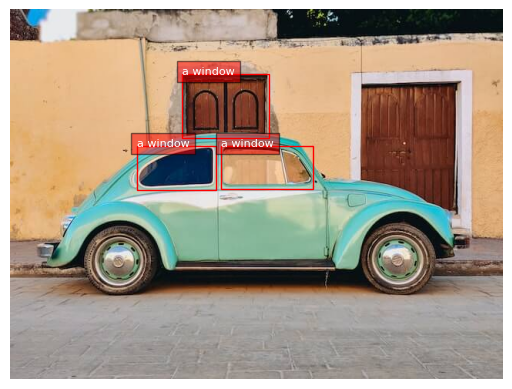

In [37]:
plot_bbox(image, bbox_results)

## region to texts

In [38]:
task_prompt = '<REGION_TO_DESCRIPTION>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_DESCRIPTION>': '\nturquoise Volkswagen Beetle<loc_52><loc_332><loc_932><loc_774>\n'}


In [39]:
task_prompt = '<REGION_TO_CATEGORY>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_CATEGORY>': '\ncar<loc_52><loc_332><loc_932><loc_774>\n'}


## ocr related tasks

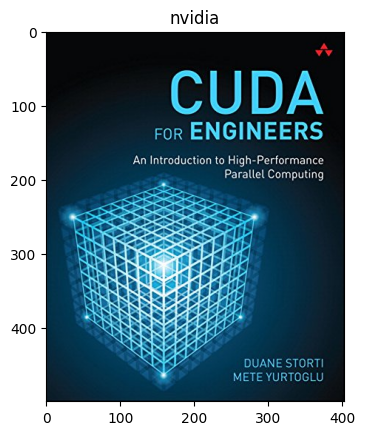

In [40]:
url = "http://ecx.images-amazon.com/images/I/51UUzBDAMsL.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
plt_imshow("nvidia", image)

In [41]:
task_prompt = '<OCR>'
run_example(task_prompt)

{'<OCR>': '\nCUDAFOR ENGINEERSAn Introduction to High-PerformanceParallel ComputingDUANE STORTIMETE YURTOGLU\n'}

In [42]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt)
print(results)

{'<OCR_WITH_REGION>': {'quad_boxes': [[167.0435028076172, 50.25, 375.7974853515625, 50.25, 375.7974853515625, 114.75, 167.0435028076172, 114.75], [144.8784942626953, 120.75, 375.7974853515625, 120.75, 375.7974853515625, 149.25, 144.8784942626953, 149.25], [115.86249542236328, 165.25, 376.6034851074219, 166.25, 376.6034851074219, 184.25, 115.86249542236328, 183.25], [239.9864959716797, 184.25, 376.6034851074219, 186.25, 376.6034851074219, 204.25, 239.9864959716797, 202.25], [266.1814880371094, 441.25, 376.6034851074219, 441.25, 376.6034851074219, 456.25, 266.1814880371094, 456.25], [252.0764923095703, 460.25, 376.6034851074219, 460.25, 376.6034851074219, 475.25, 252.0764923095703, 475.25]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORTI', 'METE YURTOGLU']}}


In [43]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)

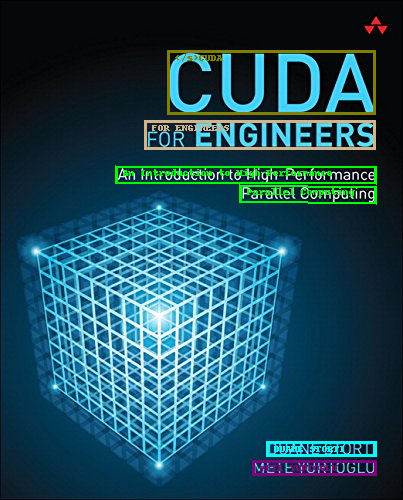

In [44]:
output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, results['<OCR_WITH_REGION>'])

In [45]:
path = "/content/drive/MyDrive/data (1)/docs/image1.jpeg"

In [46]:
image = Image.open(path).convert('RGB')


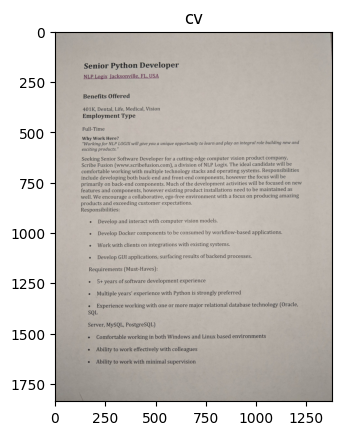

In [47]:
plt_imshow("cv", image)

In [48]:
import datetime

In [49]:
time1 = datetime.datetime.now()
task_prompt = '<OCR>'
response= run_example(task_prompt)
time2 = datetime.datetime.now()
print(time2-time1)

0:00:27.829738


In [50]:
import pprint

In [51]:
pprint.pprint(response["<OCR>"])

('\n'
 'Senior Python DeveloperNLP Logix Jacksonville, FL, USABenefits Offered401K, '
 'Dental, Life, Medical, VisionEmployment TypeFull-TimeWhy Work Here?*Working '
 'with NLP LOGIX will give you a unique opportunity to learn and play an '
 'integral role building new andexciting products.Seeking Senior Software '
 'Developer for a cutting-edge computer vision product company,Scribe Fusion '
 '(www.scribefusion.com), a division of NLPLogix. The ideal candidate will '
 'becomfortable working with multiple technology stacks and operating systems. '
 'Responsibilitiesinclude developing both back-end and front-end components, '
 'however the focus will beprimarily on back-and-components. Much of the '
 'development activities will be focused on newfeatures, and components. '
 'However existing product installations need to be maintained aswell. We '
 'engage with a collaborative, ego-free environment with a focus on producing '
 'amazingproducts and exceeding customer expectations.Respons